In [2]:
from astropy.io import fits
import numpy as np

In [89]:
red_channel = fits.open('./masterR.fits')
green_channel = fits.open('./masterG.fits')
blue_channel = fits.open('./masterB.fits')

In [120]:
r = red_channel[0].data
g = green_channel[0].data
b = blue_channel[0].data

r.shape, g.shape, b.shape

((2048, 2048), (2048, 2048), (2048, 2048))

In [121]:
remove_overexposed = lambda x: x if x < 255. else 255.
remove_overexposed = np.vectorize(remove_overexposed)

r = remove_overexposed(255.*r/1800.)
g = remove_overexposed(255.*g/2000.)
b = remove_overexposed(255.*b/1500.)

r.shape, g.shape, b.shape

((2048, 2048), (2048, 2048), (2048, 2048))

In [108]:
rgbArray = np.zeros((2048, 2048, 3), 'uint8')
rgbArray[..., 0] = r
rgbArray[..., 1] = g
rgbArray[..., 2] = b

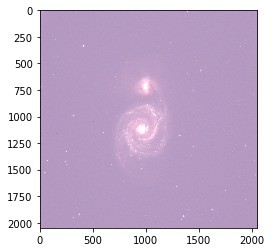

In [109]:
plt.imshow(rgbArray)

In [110]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [111]:
rgbArray.shape

(2048, 2048, 3)

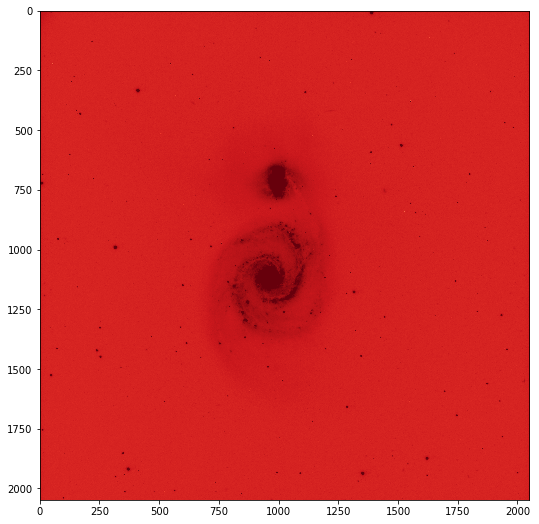

In [112]:
plt.figure(figsize=(9, 9))
plt.imshow(r, vmin=0, vmax=255, cmap=plt.cm.Reds)

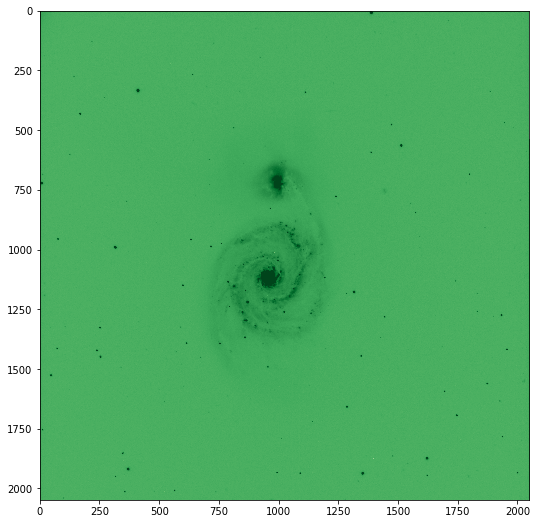

In [113]:
plt.figure(figsize=(9, 9))
plt.imshow(g, vmin=0, vmax=255, cmap=plt.cm.Greens)

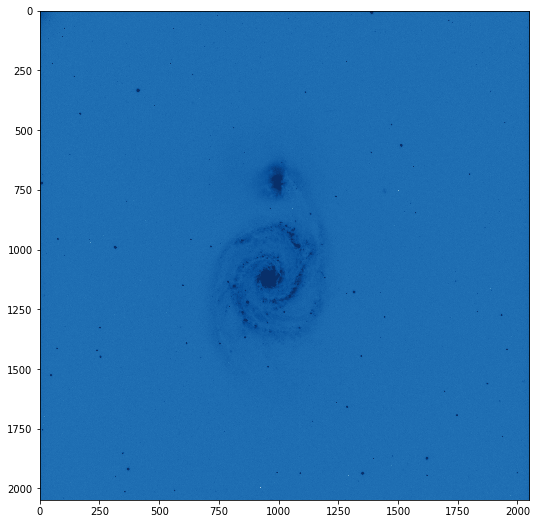

In [114]:
plt.figure(figsize=(9, 9))
plt.imshow(b, vmin=0, vmax=255., cmap=plt.cm.Blues)

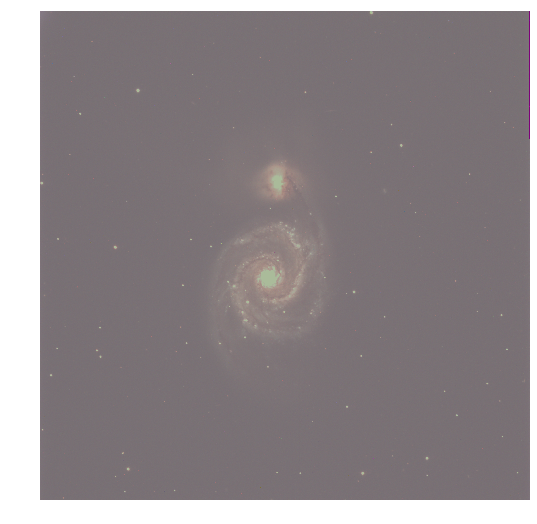

In [209]:
r_ = 0.99*r
g_ = 0.98*g
b_ = 0.3*b

N = 1.2

r_ = N*np.array((205*r_/np.max(N*r_)), dtype=np.uint8)
g_ = N*np.array((225*g_/np.max(N*g_)), dtype=np.uint8)
b_ = N*np.array((185*b_/np.max(N*b_)), dtype=np.uint8)

rgbArray[..., 0] = r_
rgbArray[..., 1] = g_
rgbArray[..., 2] = b_

plt.figure(figsize=(9, 9))
plt.imshow(rgbArray)
plt.axis('off')

plt.imsave('my_try.png', rgbArray)
plt.show()

In [23]:
from astropy.visualization import make_lupton_rgb

In [24]:
rgb_img = make_lupton_rgb(r, g , b)

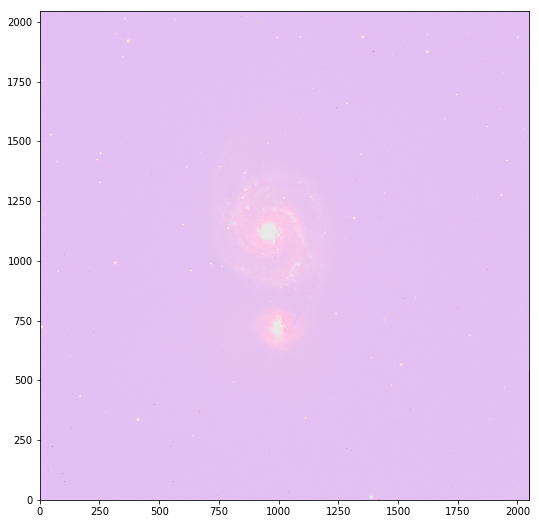

In [25]:
plt.figure(figsize=(9, 9))
plt.imshow(rgb_img, origin='lower', vmin=0, vmax=255)

In [210]:
import aplpy

In [231]:
aplpy.make_rgb_cube(['masterR_.fits', 'masterG_.fits', 'masterB_.fits'], 'masterRGB.fits', north=False)

In [232]:
aplpy.make_rgb_image('masterRGB.fits', 'masterRGB.png')

INFO: Red: [aplpy.rgb]
INFO: vmin =  1.253e+03 (auto) [aplpy.rgb]
INFO: vmax =  2.037e+03 (auto) [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin =  1.130e+03 (auto) [aplpy.rgb]
INFO: vmax =  1.742e+03 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin =  1.116e+03 (auto) [aplpy.rgb]
INFO: vmax =  1.483e+03 (auto) [aplpy.rgb]


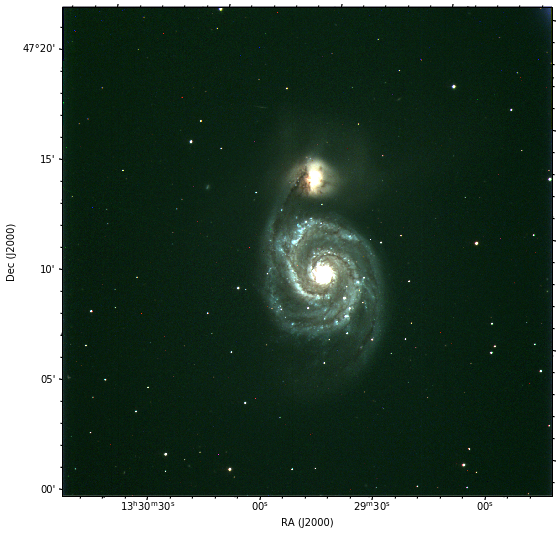

In [237]:
f = aplpy.FITSFigure('masterRGB_2d.fits')
f.show_rgb('masterRGB.png', interpolation='none')

In [238]:
f.savefig('bestMaster.png', max_dpi=1000, dpi=500)